TIME SERIES 

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
# import MyFunc import *
import warnings
warnings.filterwarnings('ignore')

In [15]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(x):
    indices = ['ADF: Test statistic', 'p_value', '# of Lags', '# of Observations']
    test = adfuller(x, autolag = "AIC")
    results = pd.Series(test[:4], index = indices) 
    for key, value in test[4].items():
        results[f'Critical value ({key})'] = value

    if results[1] <= 0.05:
        print('Reject the null hypothesis (H0), \n the data is stationary.')
    else:
        print("Fail to reject the null hypothesis (H0), \n the data is non-stationary.")

    return results


In [16]:
def kpss_test(x):
    indices = ['KPSS: Test statistic', 'p value', '# of Lags']
    test = kpss(x)
    results = pd.Series(test[:3], index = indices)
    for key, value in test[3].items():
        results[f'Critical Value ({key})'] = value
    if results[1] <= 0.05:
        print("Reject the null Hypothesis (H0), \nthe data is non-stationary.")
    else:
        print("Fail to reject the null hypothesis (H0), \nthe data is stationary.")

    return results

In [17]:
df_copy = df_reversed.copy()
df_train = df_copy.iloc[:3553, :]
df_test = df_copy.iloc[3553:, :]

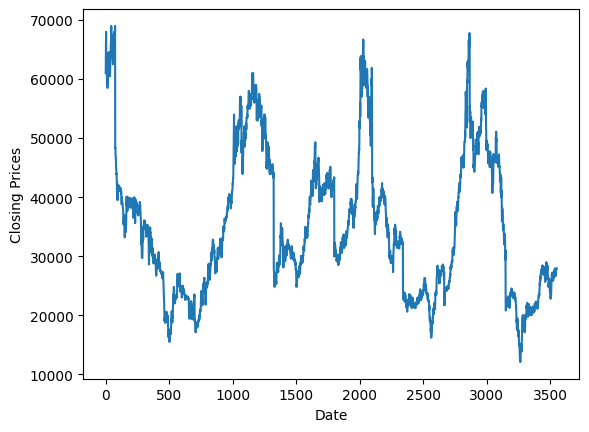

In [18]:
plt.plot(df_train['Close'])
plt.xlabel("Date")
plt.ylabel('Closing Prices')
plt.show()

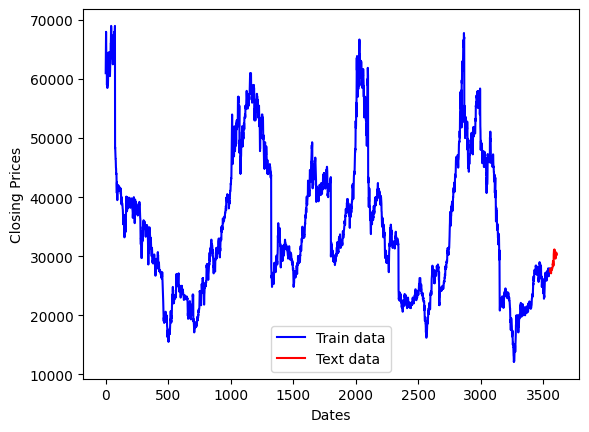

In [21]:
# Now apply the log transformation
df_close = np.log(df_copy['Close'])

train_data, test_data = df_train['Close'], df_test['Close']
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'blue', label='Train data') #Plot the 'Close' column for train_data
plt.plot(test_data, 'red', label='Text data') #Plot the 'Close' column for test_data
plt.legend()
plt.show()

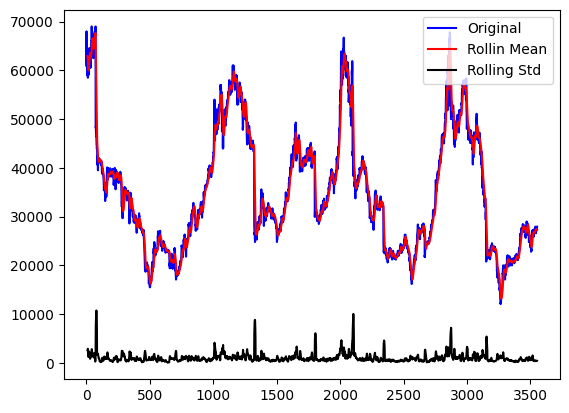

In [22]:
# Phân rã time series data
# Drawn historical data compared closed price and mean and std of 12 part in advance
rolmean = train_data.rolling(12).mean()
rolstd = train_data.rolling(12).std()
plt.plot(train_data, color ='blue', label = "Original")
plt.plot(rolmean, color = 'red', label = 'Rollin Mean')
plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend()

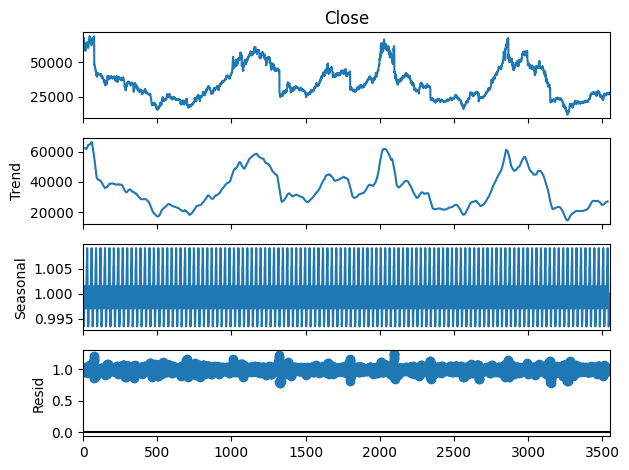

In [23]:
# Vẽ biểu đồ phân rã Chuỗi thời gian (decomepose)
decompose_results = seasonal_decompose(train_data, model = "multiplicative", period = 30)
decompose_results.plot()
plt.show()

In [24]:
# Kiểm tra tính dừng(stationary)
print(adf_test(train_data))
print('-----------------------'*4)
print(kpss_test(train_data))

Reject the null hypothesis (H0), 
 the data is stationary.
ADF: Test statistic       -3.481356
p_value                    0.008479
# of Lags                 30.000000
# of Observations       3522.000000
Critical value (1%)       -3.432208
Critical value (5%)       -2.862361
Critical value (10%)      -2.567207
dtype: float64
--------------------------------------------------------------------------------------------
Fail to reject the null hypothesis (H0), 
the data is stationary.
KPSS: Test statistic      0.376040
p value                   0.087483
# of Lags                38.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


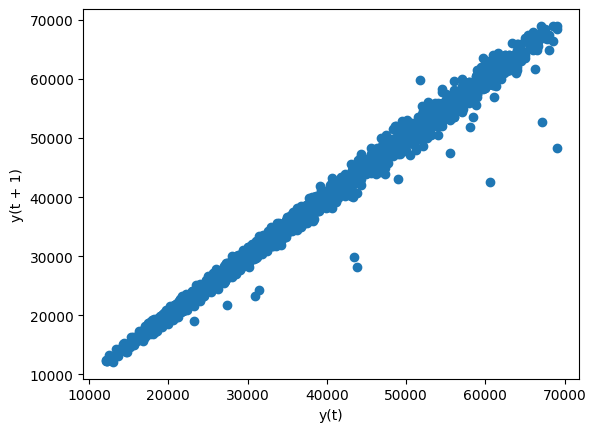

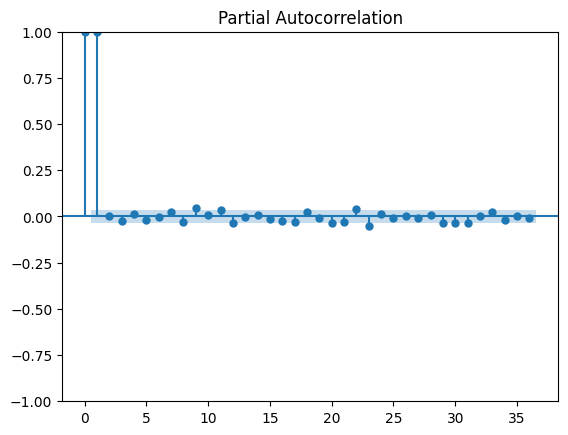

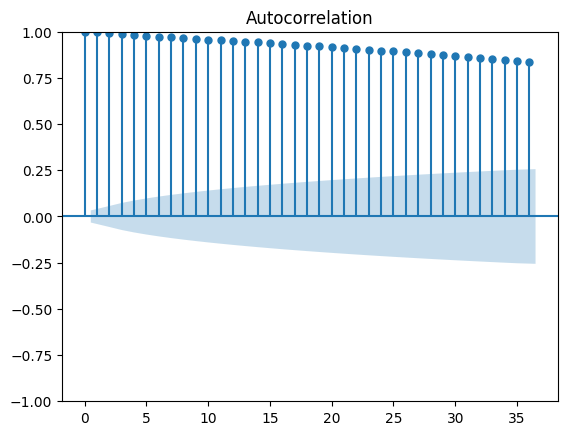

In [25]:
# Kiểm định tương quan (auto correlation)
pd.plotting.lag_plot(train_data)
plt.show()
plot_pacf(train_data)
plt.show()
plot_acf(train_data)
plt.show()

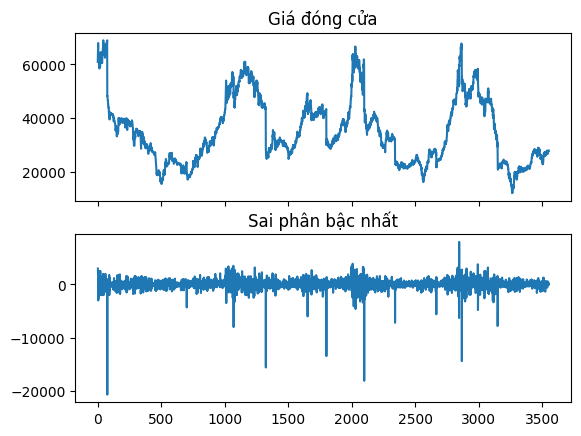

In [26]:
# Chuyển đổi chuỗi dừng
# Tính sai phân bậc 1 dữ liệu trains
diff = train_data.diff(1).dropna()
# Biểu đồ thể hiện dữ liệu ban đầu và sau khi lấy sai phân
fig, ax = plt.subplots(2, sharex = 'all')
train_data.plot(ax = ax[0], title = 'Giá đóng cửa')
diff.plot(ax = ax[1], title = "Sai phân bậc nhất")
plt.show()

Reject the null hypothesis (H0), 
 the data is stationary.
ADF: Test statistic    -9.450169e+00
p_value                 4.639272e-16
# of Lags               2.900000e+01
# of Observations       3.522000e+03
Critical value (1%)    -3.432208e+00
Critical value (5%)    -2.862361e+00
Critical value (10%)   -2.567207e+00
dtype: float64
----------------------------------------------------------------
Fail to reject the null hypothesis (H0), 
the data is stationary.
KPSS: Test statistic     0.077499
p value                  0.100000
# of Lags                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


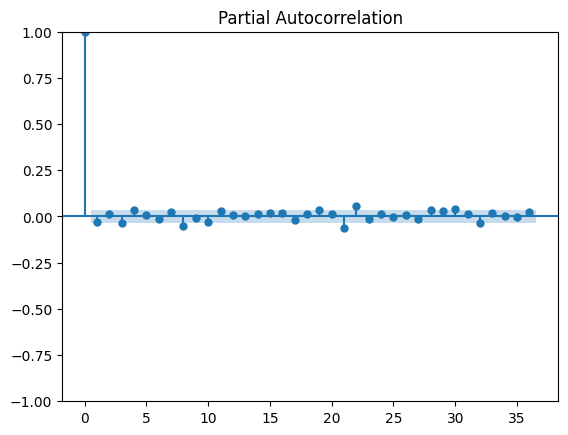

In [27]:
# Kiểm tra lại tính dừng của dữ liệu sau khi đã lấy sai phân
print(adf_test(diff))
print('----------------'*4)
print(kpss_test(diff))
plot_pacf(diff) #Có thể xác định tham số p cho mô hình ARIMA
plt.show()

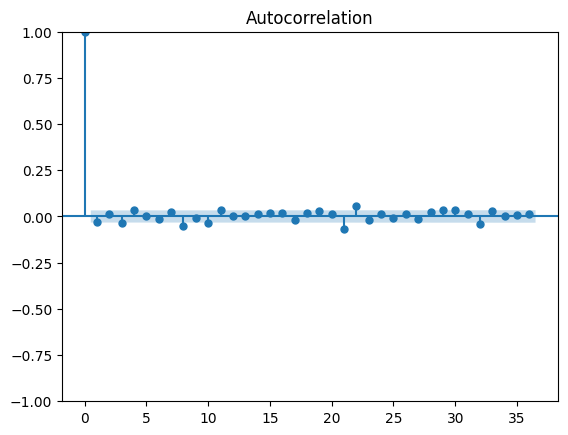

In [28]:
plot_acf(diff) #Có thể xác định tham số q cho mô hình ARIMA
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59480.689, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=59482.419, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59484.399, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59484.472, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=59480.700, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=59485.382, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59485.398, Time=1.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=59487.317, Time=0.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=59468.259, Time=3.77 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=59487.187, Time=1.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=59479.542, Time=3.91 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=4.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=59488.860, Time=2.35 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=59471.817, Time=4.47 sec
 ARIMA(2,1,3)(0,0,0)[0]  

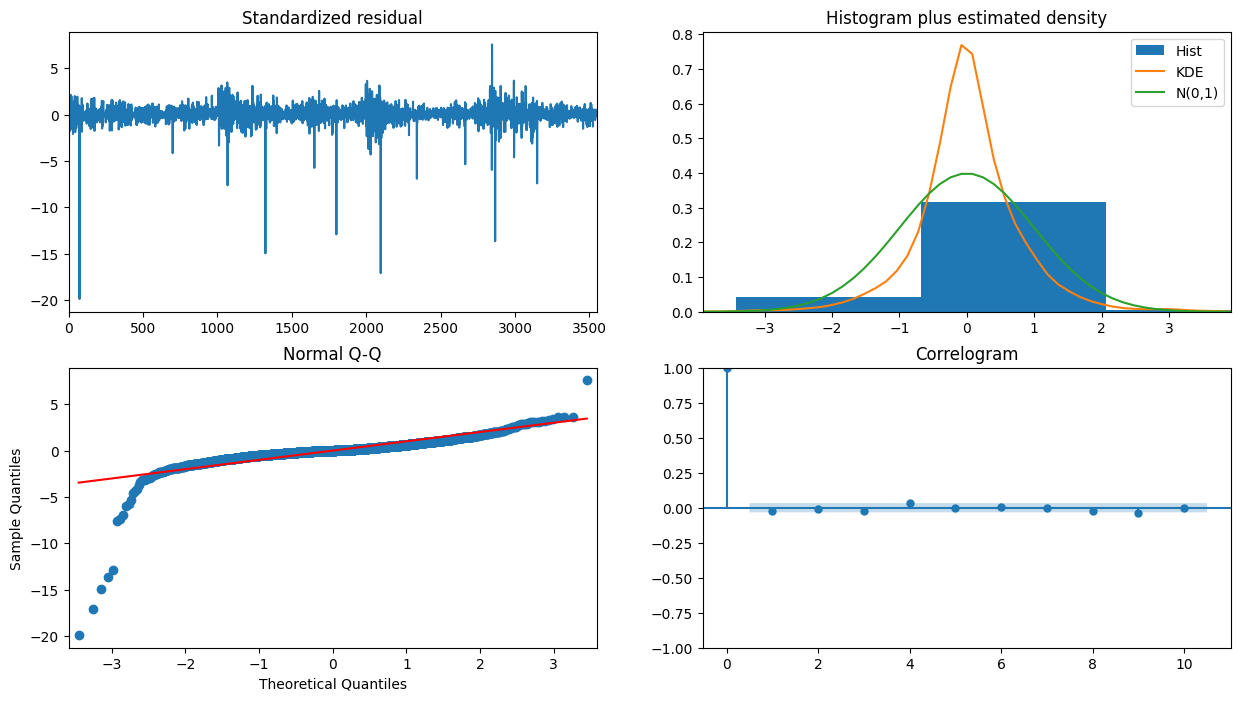

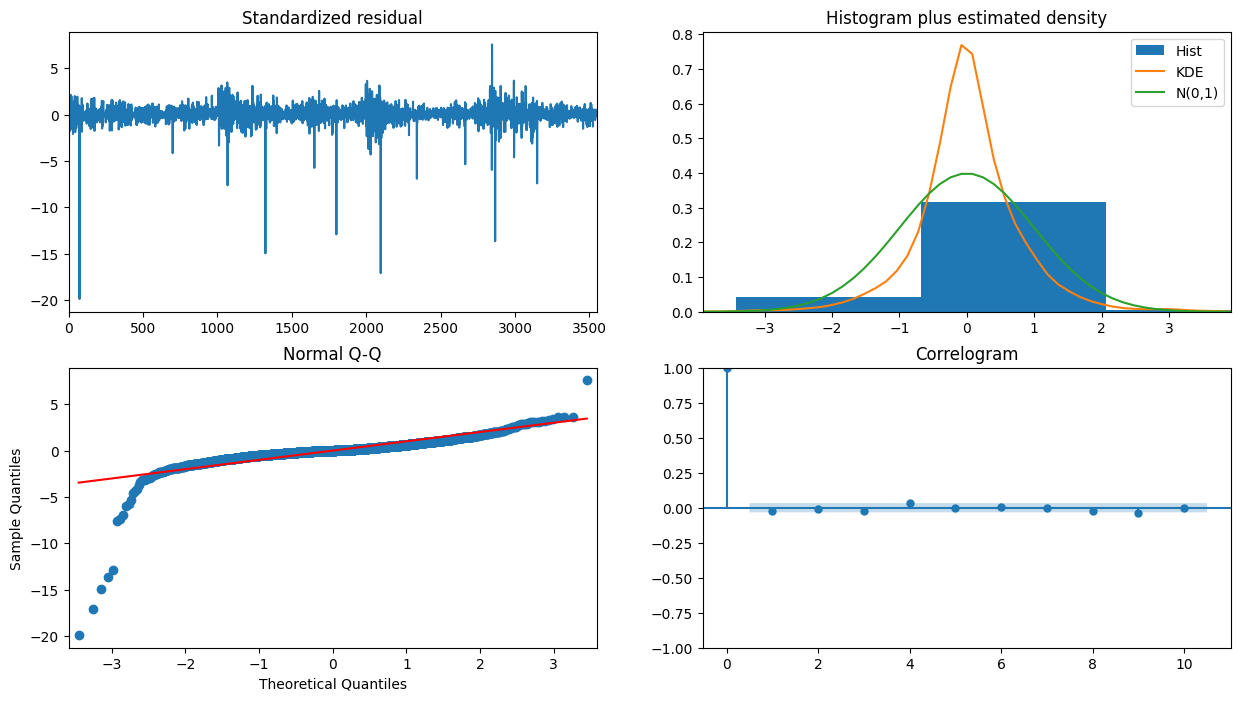

In [29]:
# Xác định tham số p, d, q cho mô hình ARIMA
stepwise_fit = auto_arima(train_data, trace= True, suppress_warnings= True)
print(stepwise_fit.summary())
stepwise_fit.plot_diagnostics(figsize = (15,8))

In [30]:
# Fit mô hình 
model = ARIMA(train_data, order = (1, 1, 2), trend = 't')
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3553
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -29737.682
Date:                Sat, 28 Sep 2024   AIC                          59485.363
Time:                        17:06:13   BIC                          59516.239
Sample:                             0   HQIC                         59496.374
                               - 3553                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -9.3047     22.264     -0.418      0.676     -52.942      34.333
ar.L1         -0.3915      0.326     -1.201      0.230      -1.030       0.247
ma.L1          0.3896      0.326      1.197      0.2

In [31]:
# Dự báo
fc = fitted.get_forecast(len(test_data))
fc_values = fc.predicted_mean
fc_values.index = test_data.index 
conf = fc.conf_int(alpha = 0.05)
lower_series = conf['lower Close']
lower_series.index = test_data.index
upper_series =conf['upper Close']
upper_series.index = test_data.index

In [32]:
# Đánh giá hiệu suất mô hình
mse = mean_squared_error(test_data, fc_values)
print('Test MSE: %.3f' % mse)
rmse = np.sqrt(mse)
print('Test RMSE: {:.3f}'.format(rmse))

Test MSE: 3950688.906
Test RMSE: 1987.634


In [34]:
# Calculate RMSE for baseline
baseline_prediction = np.full_like(test_data, train_data.mean())
baseline_rmse = np.sqrt(mean_squared_error(test_data, baseline_prediction))


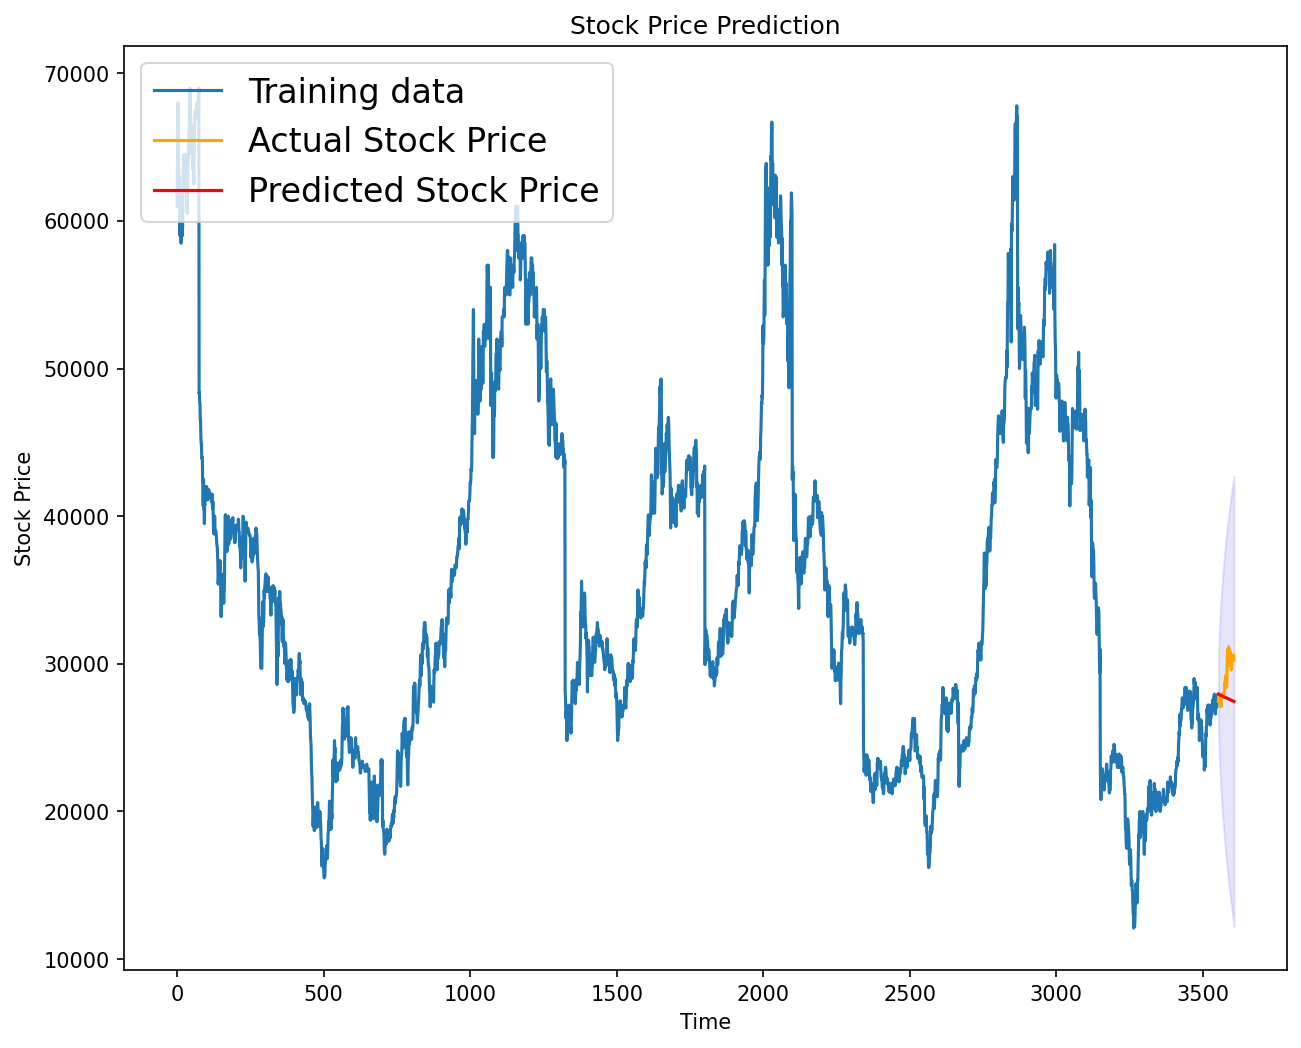

In [35]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 8),  dpi = 150)
plt.plot(train_data, label = "Training data")
plt.plot(test_data, color = 'orange', label = 'Actual Stock Price')
plt.plot(fc_values, color ='red', label = "Predicted Stock Price")
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'b', alpha =.10)
plt.title("Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc = 'upper left', fontsize = 16)
plt.show()

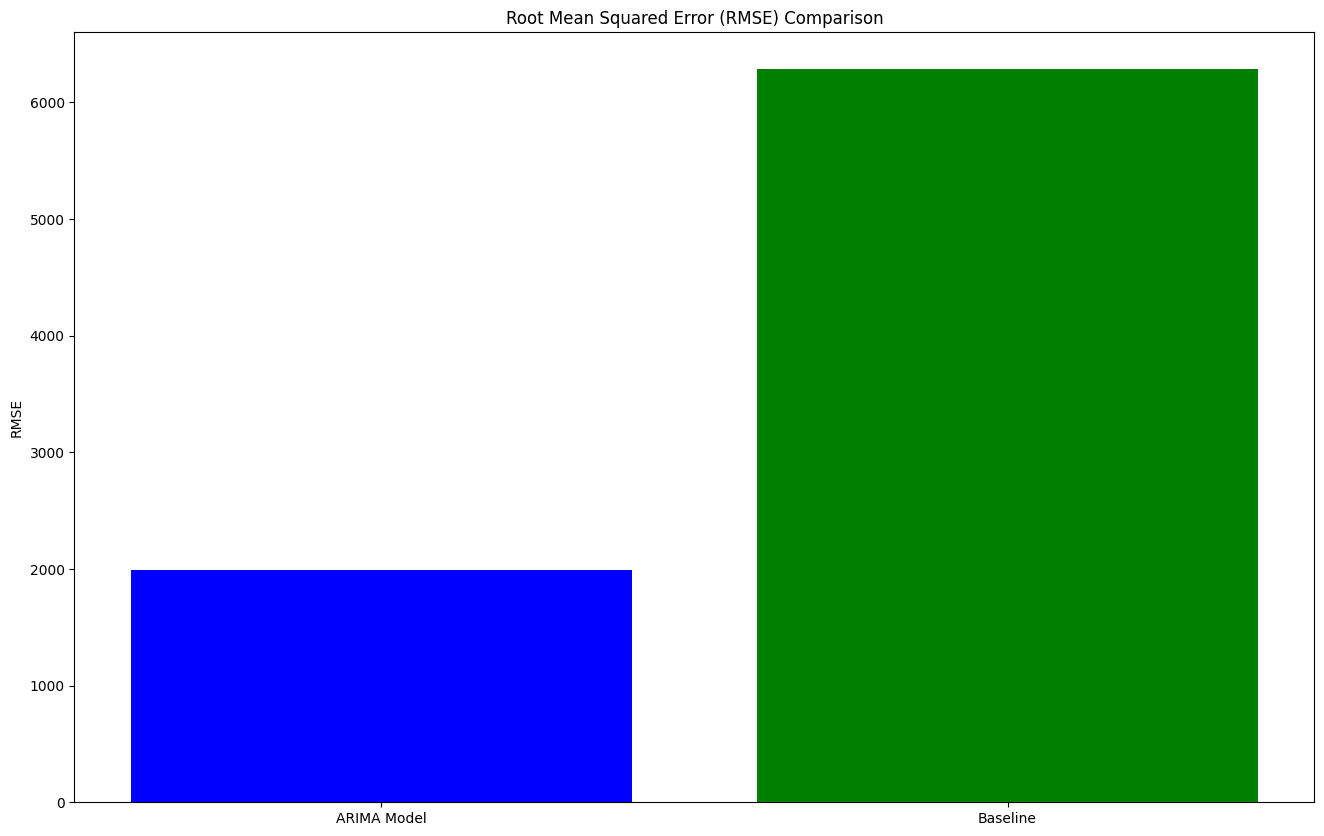

ARIMA Model RMSE: 1987.63
Baseline RMSE: 6286.56


In [36]:
# Visualize RMSE comparision
plt.figure(figsize = (16, 10))
plt.bar(['ARIMA Model', 'Baseline'], [rmse, baseline_rmse], color = ['blue', 'green'])
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.show()

print("ARIMA Model RMSE: {:.2f}".format(rmse))
print("Baseline RMSE: {:.2f}".format(baseline_rmse))